## Loading Data

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

+ We are looking at several famous single stocks in US stock market:

+ [Apple Inc. (AAPL)](https://finance.yahoo.com/quote/AAPL/) 

+ [The Boeing Company (BA)](https://finance.yahoo.com/quote/BA/) 

+ [Citigroup Inc. (C)](https://finance.yahoo.com/quote/C/)

+ [Starbucks Corporation (SBUX)](https://finance.yahoo.com/quote/SBUX/) 

+ [International Business Machines Corporation (IBM)](https://finance.yahoo.com/quote/IBM/)

In [4]:
# Import stocks 
ts = data.DataReader([ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ], 'yahoo', start='2018/06/01', end='2021/05/31')
ts.tail()

Attributes   Adj Close                                                 \
Symbols           AAPL          BA          C        SBUX         IBM   
Date                                                                    
2021-05-24  127.099998  237.440002  78.029999  112.519997  144.720001   
2021-05-25  126.900002  240.740005  77.279999  112.629997  143.789993   
2021-05-26  126.849998  241.369995  77.519997  112.849998  143.380005   
2021-05-27  125.279999  250.699997  78.760002  113.510002  143.820007   
2021-05-28  124.610001  247.020004  78.709999  113.879997  143.740005   

Attributes       Close                                                 ...  \
Symbols           AAPL          BA          C        SBUX         IBM  ...   
Date                                                                   ...   
2021-05-24  127.099998  237.440002  78.029999  112.519997  144.720001  ...   
2021-05-25  126.900002  240.740005  77.279999  112.629997  143.789993  ...   
2021-05-26  126.849998  241.369995  77.519997  112.849998  143.380005  ...   
2021-05-27  125.279999  250.699997  78.760002  113.510002  143.820007  ...   
2021-05-28  124.610001  247.020004  78.709999  113.879997  143.740005  ...   

Attributes        Open                                                 \
Symbols           AAPL          BA          C        SBUX         IBM   
Date                                                                    
2021-05-24  126.010002  235.139999  77.830002  111.800003  145.059998   
2021-05-25  127.820000  240.000000  78.199997  112.919998  144.919998   
2021-05-26  126.959999  241.699997  77.209999  113.300003  143.500000   
2021-05-27  126.440002  248.110001  78.519997  113.470001  143.820007   
2021-05-28  125.570000  247.479996  78.660004  114.349998  144.210007   

Attributes      Volume                                                
Symbols           AAPL          BA           C       SBUX        IBM  
Date                                                                  
2021-05-24  63092900.0  10106000.0  16750200.0  5476100.0  3297600.0  
2021-05-25  72009500.0  12908000.0  20015800.0  5391800.0  3937200.0  
2021-05-26  56575900.0   7240200.0  15243400.0  3841600.0  3083800.0  
2021-05-27  94625600.0  18404400.0  17467000.0  7378400.0  5630300.0  
2021-05-28  71311100.0  11197400.0  14392800.0  4239800.0  2534600.0  

[5 rows x 30 columns]

+ We only consider adjusted close as daily price.

In [5]:
# Extract adjusted close prices
ts = ts['Adj Close']
ts.head()

Symbols,AAPL,BA,C,SBUX,IBM
Date,,,,,
2018-06-01,45.984558,343.333923,61.111942,53.621040,122.697815
2018-06-04,46.368881,347.193481,61.166451,53.771790,123.640007
2018-06-05,46.726624,346.587097,60.639626,52.462124,124.210480
2018-06-06,46.888577,357.617035,61.974861,53.866001,125.083511
2018-06-07,46.762878,354.700775,62.174690,53.837742,125.645370


+ Since we have loaded time series, let's have a look at the historical performance.
+ In order for fair comparison, we normalize the starting point in the same.

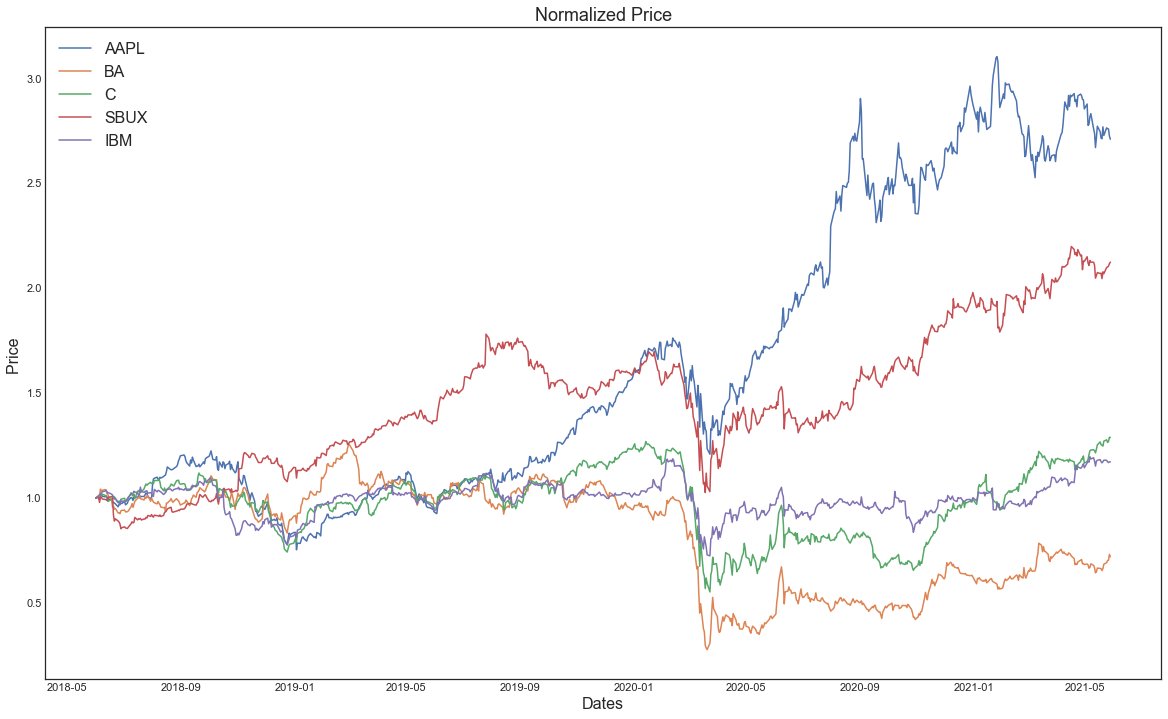

In [6]:
# Normalize the stock prices
normalized_price = (ts/ts.iloc[0])
fig =plt.figure(figsize=(20,12))
plt.plot(normalized_price)
title_text_obj = plt.title("Normalized Price", fontsize = 18)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Price ', fontsize = 16)
plt.legend(('AAPL', 'BA', 'C', 'SBUX', 'IBM' ),fontsize = 16,loc = 'best')
plt.show()

## Return

+ Price change is what matters most in our project, we need to calculate the daily price change based on pandas methods.

In [7]:
AAPL_return = ts['AAPL'].pct_change()
AAPL_return.head()

Date
2018-06-01         NaN
2018-06-04    0.008358
2018-06-05    0.007715
2018-06-06    0.003466
2018-06-07   -0.002681
Name: AAPL, dtype: float64

In [9]:
BA_return = ts['BA'].pct_change()
C_return = ts['C'].pct_change()
SBUX_return = ts['SBUX'].pct_change()
IBM_return = ts['IBM'].pct_change()

returns = ts.pct_change()

In [10]:
returns

Symbols,AAPL,BA,C,SBUX,IBM
Date,,,,,
2018-06-01,NaN,NaN,NaN,NaN,NaN
2018-06-04,0.008358,0.011241,0.000892,0.002811,0.007679
2018-06-05,0.007715,-0.001747,-0.008613,-0.024356,0.004614
2018-06-06,0.003466,0.031824,0.022019,0.026760,0.007029
2018-06-07,-0.002681,-0.008155,0.003224,-0.000525,0.004492
...,...,...,...,...,...
2021-05-24,0.013314,0.011157,0.004894,0.014425,-0.000138
2021-05-25,-0.001574,0.013898,-0.009612,0.000978,-0.006426
2021-05-26,-0.000394,0.002617,0.003106,0.001953,-0.002851


In [13]:
AAPL_return.max()

0.11980816476266076

+ Now we have $N$ stocks，and the $i-th$ stock has return $R_i$ with expectation $r_i$. We can define

 $${R}=\left( \begin{array}{c}R_1\\ \vdots\\R_N\end{array}\right)$$
 
 Then we have ：
 
 $$E({R})=\left( \begin{array}{c} r_1\\ \vdots\\r_N\end{array}\right)$$

In [9]:
# use mean to calculate expected return
returns.mean()

Symbols
AAPL    0.001787
BA      0.000258
C       0.000252
SBUX    0.001100
IBM     0.000099
dtype: float64

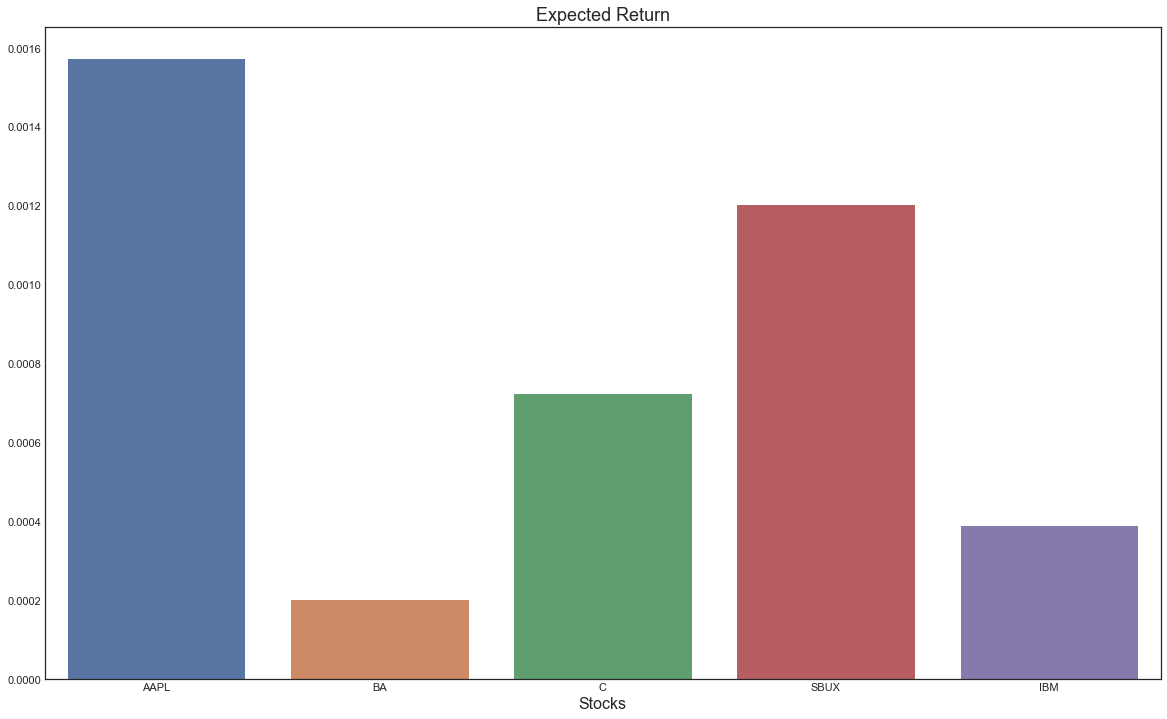

In [21]:
fig =plt.figure(figsize=(20,12))
# plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], returns.mean().values, color='viridis')
sns.barplot(x=['AAPL', 'BA', 'C', 'SBUX', 'IBM'], y=returns.mean())
title_text_obj = plt.title("Expected Return", fontsize = 18)
xlabel_obj = plt.xlabel('Stocks', fontsize = 16)
plt.show()

## Volatility

+ Here we use standard deviation to measure volatility.

+ For daily volatility, we can use formula below to calculate:
$$ std = \sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2 / (N-1)}$$

+ To convert daily volatility to annualized volatility, we need to multiply the standard deviation by square root of 252 (usually we assume market is open for 252 days per year).

$$ Annualized std = std * \sqrt{252} $$

+ For example, we calculate the annualized volatility for Apple:

In [22]:
ONEYEARDAYS = 252
AAPL_std = AAPL_return.std() * np.sqrt(ONEYEARDAYS)
AAPL_std

0.35538963813800173

+ And we do the same thing for the remaining stocks:

In [23]:
BA_std = BA_return.std() * np.sqrt(ONEYEARDAYS)
C_std = C_return.std() * np.sqrt(ONEYEARDAYS)
SBUX_std = SBUX_return.std() * np.sqrt(ONEYEARDAYS)
IBM_std = IBM_return.std() * np.sqrt(ONEYEARDAYS)

In [24]:
stocks_std = ts.pct_change().std().apply(lambda x: x*np.sqrt(252) )
stocks_std

Symbols
AAPL    0.355390
BA      0.567834
C       0.441676
SBUX    0.320407
IBM     0.301784
dtype: float64

+ We can visualize how their volatilities look like

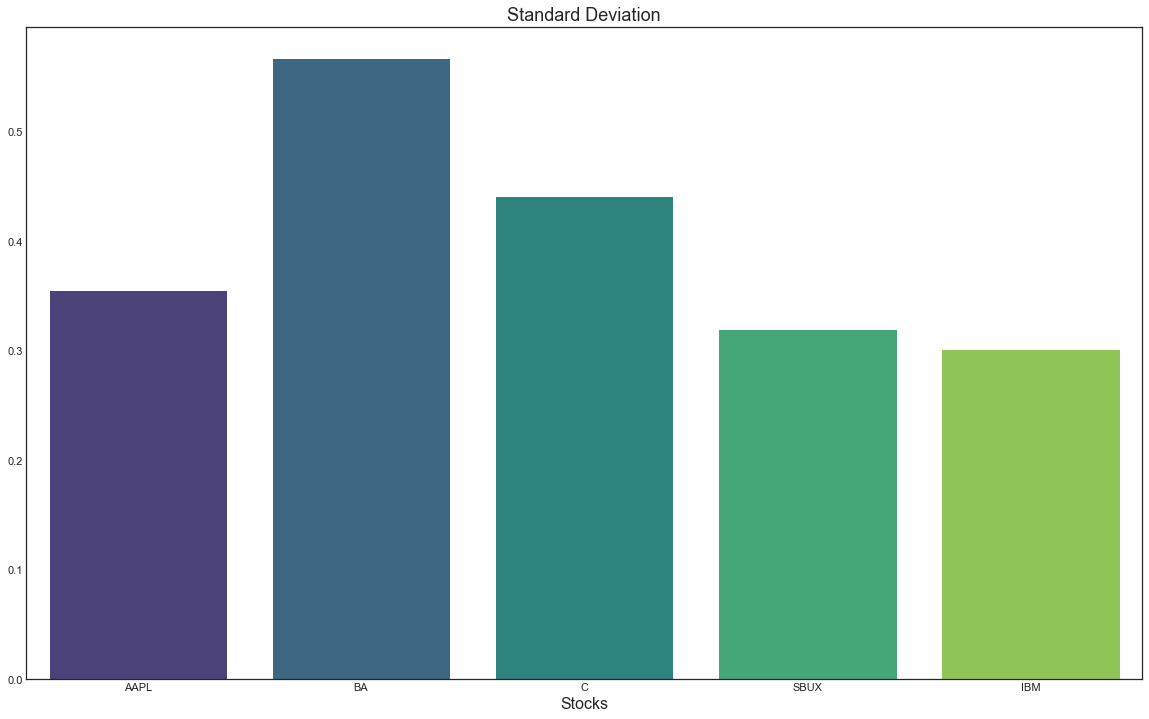

In [27]:
fig =plt.figure(figsize=(20,12))
# plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], stocks_std.values, color='blue')
sns.barplot(x=['AAPL', 'BA', 'C', 'SBUX', 'IBM'], y=stocks_std, palette='viridis')
title_text_obj = plt.title("Standard Deviation", fontsize = 18)
xlabel_obj = plt.xlabel('Stocks', fontsize = 16)
plt.show()

+ Other risk measure for return distribution:

  $Skewness = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^3\right]$
  
  $Kurtosis = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^4\right]$

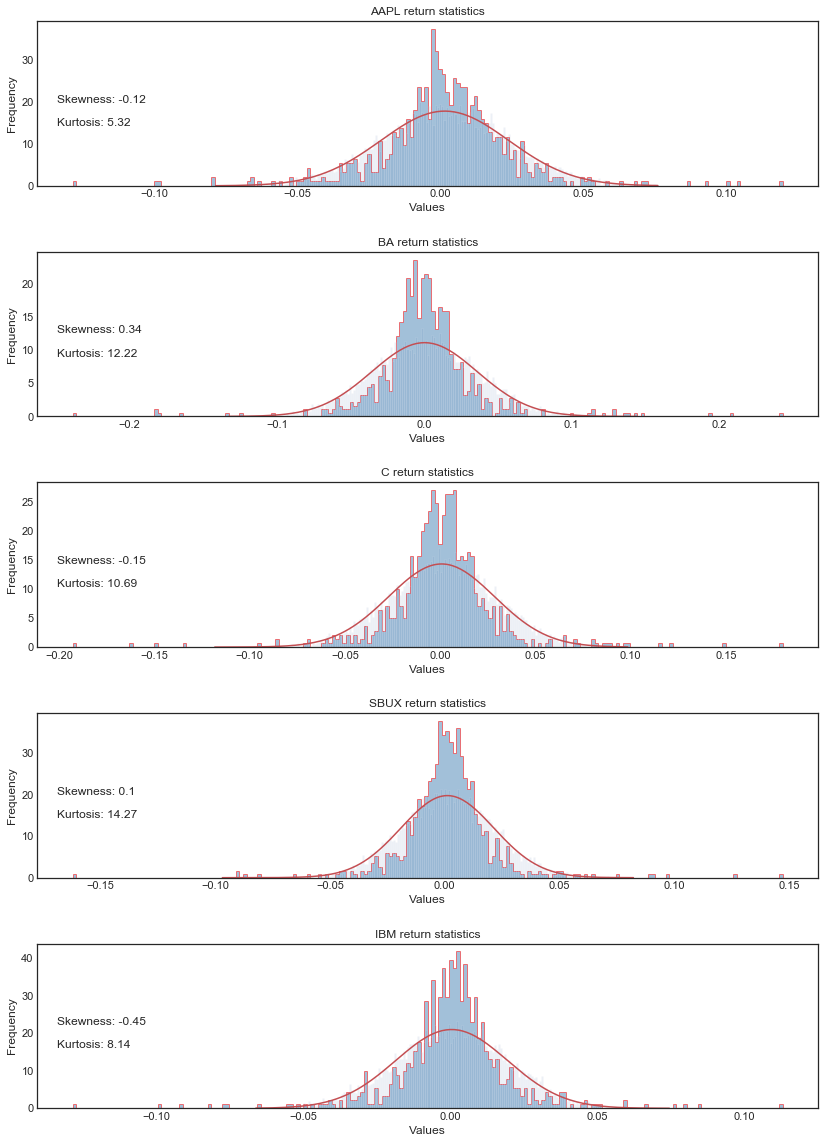

In [28]:
binsnumber = 200
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,20))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

## AAPL
tickname = 'AAPL'
plt.subplot(511)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## BA
tickname = 'BA'
plt.subplot(512)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## C
tickname='C'
plt.subplot(513)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## SBUX
tickname='SBUX'
plt.subplot(514)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## IBM
tickname='IBM'
plt.subplot(515)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

plt.show();

### Sharpe Ratio
$$\frac{R_p - R_f }{\sigma_p}$$

Where
+ $R_p$ is the return of the portfolio
+ $R_f$ is the risk-free rate, here we take it as 0.
+ $\Sigma_p$ is the standard deviation of the portfolio

In [29]:
stats = pd.DataFrame()
stats['Annualized Returns(%)']    = np.round(returns.mean() * ONEYEARDAYS *100,2)
stats['Annualized Volatility(%)'] = np.round(returns.std() * np.sqrt(ONEYEARDAYS)*100,2)
stats['Sharpe Ratio'] = np.round(stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)'],2)
stats.style.bar(color=['red','green'], align='zero')

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
Symbols,,,
AAPL,39.700000,35.540000,1.120000
BA,5.100000,56.780000,0.090000
C,18.280000,44.170000,0.410000
SBUX,30.350000,32.040000,0.950000
IBM,9.880000,30.180000,0.330000


## Covariance, correlation and covariance matrix

+ If we consider multiple stocks, we also need to consider the covariance between each stock.
$$\Omega=Cov(R)$$



+ Let $\Omega_{ij}$ be the covariance of $R_i$ and $R_j$, $\Omega_{ij}=Cov(R_i,R_j)$, $\sigma_i=\sqrt{\Omega_{ii}}$ is the standard deviation (std) of $R_i$. 

In [17]:
AAPL_return.cov(BA_return)

0.00034433345902670613

In [18]:
AAPL_return.cov(AAPL_return)

0.0004889603023612489

In [19]:
AAPL_return.var()

0.0004889603023612493

In [20]:
AAPL_return.corr(BA_return)

0.4396833097762502

In [30]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,BA,C,SBUX,IBM
Symbols,,,,,
AAPL,0.000501,0.000340,0.000301,0.000236,0.000207
BA,0.000340,0.001280,0.000671,0.000398,0.000360
C,0.000301,0.000671,0.000774,0.000361,0.000336
SBUX,0.000236,0.000398,0.000361,0.000407,0.000209
IBM,0.000207,0.000360,0.000336,0.000209,0.000361


## Weights and stocks combination

### Let's start from 2 stocks:


Suppose two stocks have expected ***daily return*** as $r_1$ and $r_2$
    
And we allocate different weights to them as $w_1$ and $w_2$ where $w_1 + w_2 = 1$

Then the combination can have expected return as of : $$E(r_c) = w_1r_1 + w_2r_2$$

In order to calculate the combination's volatility (variance & standard deviation), we need to take their correlation $\rho_{12}$ and volatility $\sigma_1,\sigma_2$ into consideration. ***All as daily***

$$\sigma_{r_c}^2=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2$$



####  Take AAPL and BA as an example:

In [22]:
returns.mean()

Symbols
AAPL    0.001787
BA      0.000258
C       0.000252
SBUX    0.001100
IBM     0.000099
dtype: float64

In [23]:
ts.pct_change().std()

Symbols
AAPL    0.022112
BA      0.035416
C       0.027521
SBUX    0.019897
IBM     0.018910
dtype: float64

Now we have $$ r_1=0.001787,r_2=0.000258,\sigma_1=0.022112,\sigma_2=0.035416,\rho_{12}=0.4396833097762502$$

In [34]:
r1=0.001787;
r2=0.000258;
sig1=0.022112;
sig2=0.035416;
rho12=0.4396833097762502

And remember we have constraint as $w_1 + w_2 = 1$

So we can express $w_2 = 1 - w_1$

And correspondingly, 
 $$E(r_c) = wr_1 + (1-w)r_2$$
 
$$\sigma_{r_c}^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2$$


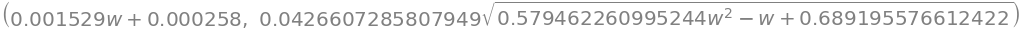

In [35]:
import sympy as sy
from sympy.interactive import printing

printing.init_printing(use_latex=True)
## w for w_1, where w_2 = 1- w_1 = 1- w
w=sy.symbols('w',positive = True, real = True)

## expected return of 2 stocks combination:
r_c =w*r1+(1-w)*r2

variance_c = sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)
std_c =sy.sqrt(variance_c)

sy.simplify(r_c), sy.simplify(std_c)

In [36]:
def get_two_stocks_std(w):
    return np.sqrt(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

def get_two_stocks_return(w):
    return w*r1+(1-w)*r2

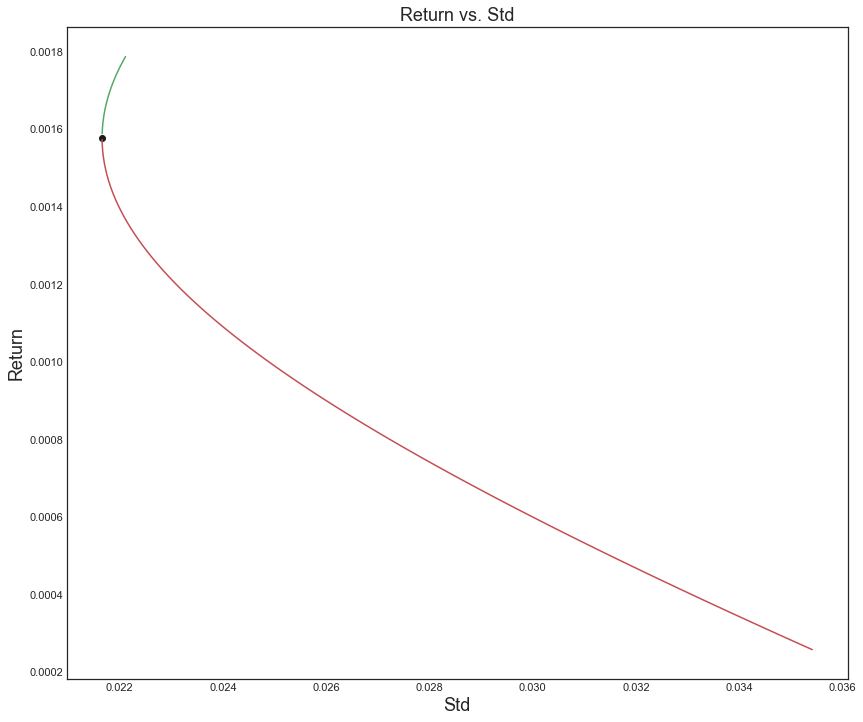

In [45]:
fig=plt.figure(figsize=(14,12)) 
ws = np.linspace(0,1,101)
std_series = get_two_stocks_std(ws)
return_series = get_two_stocks_return(ws)



## solve to get this
w_min = (sig2**2- sig1*sig2*rho12)/(sig1**2 + sig2**2 - 2*sig1*sig2*rho12) 

plt.plot(get_two_stocks_std(w_min) , get_two_stocks_return(w_min), "ko")

plt.plot(get_two_stocks_std(ws[ws < w_min]) , get_two_stocks_return(ws[ws < w_min]),  "r-")
plt.plot(get_two_stocks_std(ws[ws > w_min]) , get_two_stocks_return(ws[ws > w_min]),  "g-")

plt.title("Return vs. Std", fontsize = 18);
plt.ylabel("Return", fontsize = 18);
plt.xlabel("Std", fontsize = 18);

#### Here we can see the relationship between return and standard deviation when we combine 2 stocks together. Such combination is also called ***Portfolio***.

Portfolio can variant based on the weights we allocate to different stocks. And we can find that there exists one point when the std of the portfolio is at its minimum.

And the green part of the line is called **"Efficient Frontier"**

## Portfolio of multiple stocks

+ Let $w_i$ be the weight on $R_i$ in portfolio:
  $$w=\left( \begin{array}{c}w_1\\ \vdots\\ w_N\end{array}\right)$$

+ Weights have constraint $w_1+\cdots+w_N={\bf 1} ^T {w}=1$

+ Portfolio with weights $w$ has expected return：
    $$\sum_{i=1}^{N}w_i r_i=w^T{E(R)}$$
    

+ Portfolio with weights $w$ has variance：
$$Variance _{p} = \sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_j\Omega_{i,j}=w^T\varOmega w$$

+ Based on such conclusions, how can we find a way to find the minimum variance of the portfolio?

There exists theoretical methods. But here we apply a more practical way called ***Monte Carlo Simulation***.

In [46]:
portfolio_returns = []
portfolio_vols = []


[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]

for p in range(50000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(returns[[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]].mean()* weights))
    portfolio_vols.append(np.sqrt(np.dot(weights.T,np.dot(returns[[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]].cov(),
                                                             weights))))
portfolio_returns = np.array(portfolio_returns)

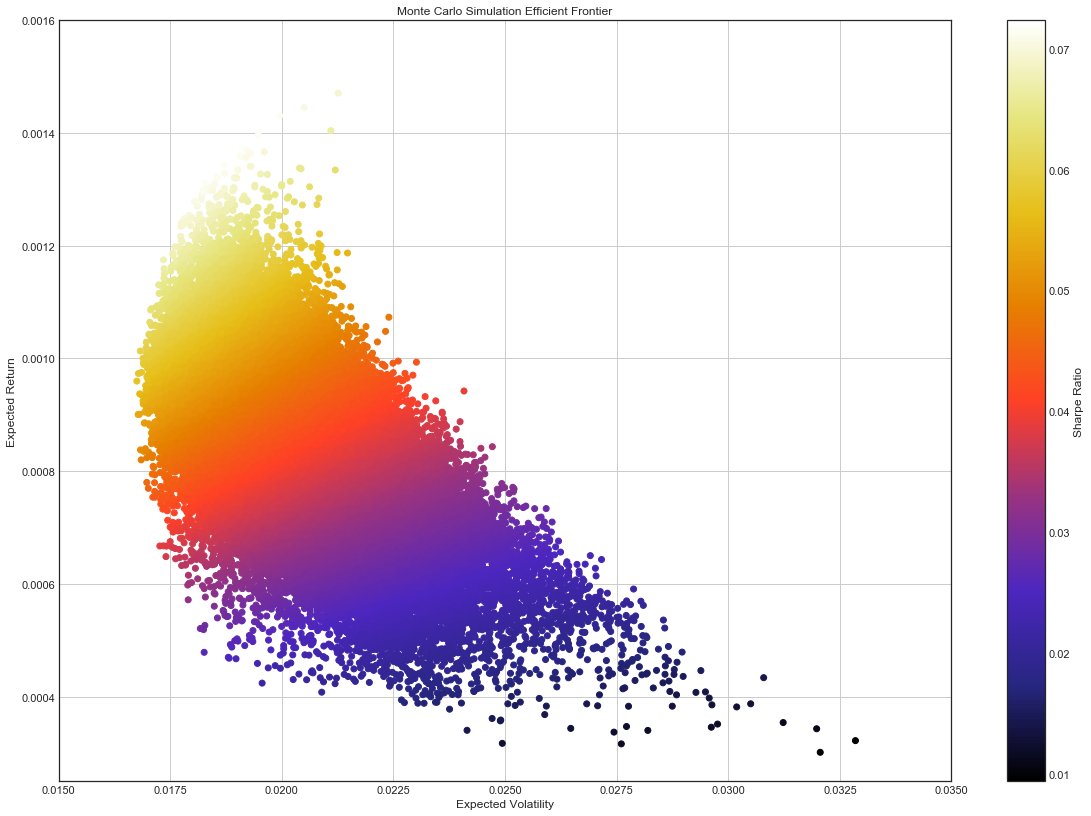

In [58]:
fig = plt.figure(figsize = (20,14))

plt.scatter(portfolio_vols, portfolio_returns, c = portfolio_returns / portfolio_vols, marker = 'o',cmap='CMRmap')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier')
plt.xlim(0.015,0.035)
plt.ylim(0.00025,0.0016)
plt.show();